In [1]:
import pandas as pd

### Load Carlifornia District's House Value Regression dataset
#### Description of the features can be found here: https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset

In [11]:
from sklearn.datasets import load_breast_cancer

In [12]:
cancer = load_breast_cancer()

In [13]:
X = pd.DataFrame(cancer.data, columns=cancer.feature_names)
y = pd.DataFrame(cancer.target, columns=['Cancer'])

In [24]:
X = X.iloc[:,:5]

In [25]:
y.head()

,Cancer
0,0
1,0
2,0
3,0
4,0


In [26]:
#Produce feature stats, such as min, max, mean etc
X.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness
count,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360
std,3.524049,4.301036,24.298981,351.914129,0.014064
min,6.981000,9.710000,43.790000,143.500000,0.052630
25%,11.700000,16.170000,75.170000,420.300000,0.086370
50%,13.370000,18.840000,86.240000,551.100000,0.095870
75%,15.780000,21.800000,104.100000,782.700000,0.105300
max,28.110000,39.280000,188.500000,2501.000000,0.163400


In [27]:
y.describe()

,Cancer
count,569.000000
mean,0.627417
std,0.483918
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


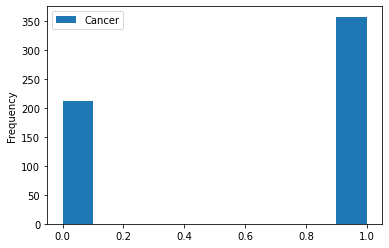

In [28]:
#Check if dataset is balanced
# Data is skewed to the left i.e. majority of districts in carlifornia have low housing value between 50,000$ and 250,000$
y.plot.hist()

### Data Modelling

In [30]:
from sklearn.model_selection import train_test_split

#split data into training and test sets

#test set size
data_size_for_testing = 0.3

x_train, x_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=data_size_for_testing, 
                                                    random_state=42,  shuffle=True,
                                                    stratify=y                                                        
                                                   )


In [31]:
#Features are standardised to improve model training and target labels transformed to integer classes.  
from sklearn.preprocessing import StandardScaler, LabelEncoder
standscaler = StandardScaler()

#We standardise the training set and use the standardised object to transform the test set to ensure consistency between training and test sets
standscaler.fit(x_train)

#training
train_features = pd.DataFrame(standscaler.transform(x_train), columns=x_train.columns)
x_train = train_features
y_train = y_train.reset_index().drop("index", axis=1)

#test
test_features = pd.DataFrame(standscaler.transform(x_test), columns=x_test.columns)
x_test= test_features
y_test = y_test.reset_index().drop("index", axis=1)





### Training Stage

In [33]:
#train a random forest model
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier()
model_rf.fit(x_train,y_train.values.ravel())


RandomForestClassifier()

### Evaluate Model Performance
#### Using Classification

In [34]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [35]:
y_val = model_rf.predict(x_test)

In [41]:
y_val

array([0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1])

In [36]:
#Performance report
print(classification_report(y_test,y_val))
print(confusion_matrix(y_test,y_val))
print(accuracy_score(y_test,y_val))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91        64
           1       0.96      0.93      0.94       107

    accuracy                           0.93       171
   macro avg       0.92      0.93      0.93       171
weighted avg       0.93      0.93      0.93       171

[[60  4]
 [ 8 99]]
0.9298245614035088


### SHAP

In [37]:
import shap

In [38]:
explainer = shap.Explainer(model_rf)

In [45]:
shap_values = explainer.shap_values(x_test)

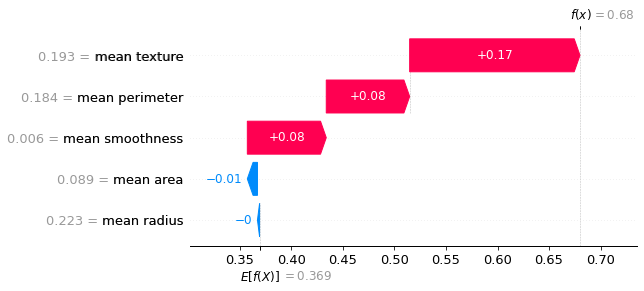

In [49]:
# visualize the first prediction's explanation
row = 100
shap.waterfall_plot(shap.Explanation(values=shap_values[0][row],
                                     base_values=explainer.expected_value[0], data=x_test.iloc[row],  
                                     feature_names=x_test.columns.tolist()))

In [ ]:
# calculate the shaply value for feature j
j = 15
M = 1000
n_features = len(x)
marginal_contributions = []
feature_idxs = list(range(n_features))
feature_idxs.remove(j)
for _ in range(M):
    z = X_train.sample(1).values[0]
    x_idx = random.sample(feature_idxs, min(max(int(0.2*n_features), random.choice(feature_idxs)), int(0.8*n_features)))
    z_idx = [idx for idx in feature_idxs if idx not in x_idx]
    
    # construct two new instances
    x_plus_j = np.array([x[i] if i in x_idx + [j] else z[i] for i in range(n_features)])
    x_minus_j = np.array([z[i] if i in z_idx + [j] else x[i] for i in range(n_features)])
    
    # calculate marginal contribution
    marginal_contribution = f.predict_proba(x_plus_j.reshape(1, -1))[0][1] - f.predict_proba(x_minus_j.reshape(1, -1))[0][1]
    marginal_contributions.append(marginal_contribution)
    
phi_j_x = sum(marginal_contributions) / len(marginal_contributions)  # our shaply value
print(f"Shaply value for feature j: {phi_j_x:.5}")

In [40]:
PI = PI_calculate(model_rgr,[x_test,y_test],r2_score)

### Plot feature importance 

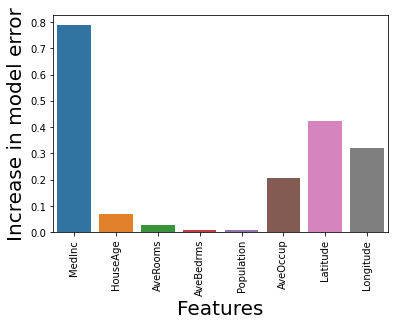

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
p = sns.barplot(x = PI.columns,y=PI.values.flatten())
p.set_xlabel("Features", fontsize = 20)
p.set_ylabel("Increase in model error", fontsize = 20)
p.set_xticklabels(p.get_xticklabels(),rotation = 90)
plt.plot()
plt.savefig('Carlifornia_house_PI.png',bbox_inches = "tight")